# HOMEWORK 1

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Training Data Set 2

In [24]:
# Reference:
# https://web.stanford.edu/~hastie/ElemStatLearn/

df = pd.read_csv("/Users/schand/Documents/ML Homework 1/train2.csv")
X_train = df.iloc[:,:].values
y_train = np.ones((731,1)) * 2
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x247,x248,x249,x250,x251,x252,x253,x254,x255,x256
0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.798,0.300,0.432,-0.799,-1.000,...,-0.947,-0.524,0.307,0.390,0.852,0.751,0.990,0.567,-0.664,-1.0
1,-1.0,-1.0,-1.0,-1.0,-1.0,-0.638,0.222,0.706,1.000,0.731,...,-0.576,0.635,0.755,0.549,0.273,0.074,-0.083,-1.000,-1.000,-1.0
2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
3,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0


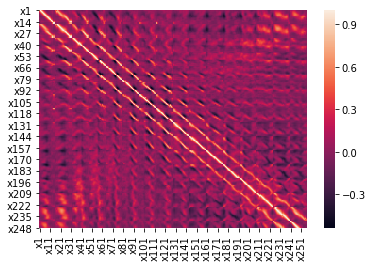

In [25]:
sns.heatmap(df.corr())

# Linear Model

In [10]:
#Fitting Model
from sklearn.linear_model import LinearRegression
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
def predict(X):
    return 1*(linear_regression_model.predict(X))

In [18]:
from sklearn.metrics import accuracy_score
train_error_rate = 1 - accuracy_score(y_train, predict(X_train))
print("Training error of the linear regression model is " ,train_error_rate)

Training error of the linear regression model is  0.0


In [21]:
#Test Model
test = pd.read_csv("/Users/schand/Documents/ML Homework 1/test.csv",header=None)
X_test = test.iloc[:,:].values
y_predict = linear_regression_model.predict(X_test)

In [28]:
y_predict = linear_regression_model.predict(X_test)
r_sq = linear_regression_model.score(X_test,y_predict)
print(r_sq)


1.0


NameError: name 'regressor_coeff_' is not defined

In [32]:
print(linear_regression_model.coef_)
print(linear_regression_model.intercept_)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[2.]


# k =15

In [164]:
from sklearn.neighbors import KNeighborsClassifier

neighbors15_classifier = KNeighborsClassifier(n_neighbors=15)
neighbors15_classifier.fit(X_train.round(), y_train.round())

/Users/schand/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [165]:
def predict_neighbors15(X):
    return 1*(neighbors15_classifier.predict(X))

In [132]:
from sklearn.metrics import accuracy_score
train_error_rate = 1 - accuracy_score(y_train.round(), predict_neighbors15(X_train).round())
print("The training error in 15 neighbors is",train_error_rate)

The training error in 15 neighbors is 0.2514321135430917


# k = 7

In [133]:
neighbors7_classifier = KNeighborsClassifier(n_neighbors=7)
neighbors7_classifier.fit(X_train.round(), y_train.round())

/Users/schand/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [134]:
def predict_neighbors7(X):
    return 1*(neighbors7_classifier.predict(X))

In [135]:
from sklearn.metrics import accuracy_score
train_error_rate = 1 - accuracy_score(y_train.round(), predict_neighbors7(X_train).round())
print("The training error in 7 neighbors is",train_error_rate)

The training error in 7 neighbors is 0.21389791381668943


# k = 5

In [136]:
neighbors5_classifier = KNeighborsClassifier(n_neighbors=5)
neighbors5_classifier.fit(X_train.round(), y_train.round())

/Users/schand/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [137]:
def predict_neighbors5(X):
    return 1*(neighbors5_classifier.predict(X))

In [138]:
from sklearn.metrics import accuracy_score
train_error_rate = 1 - accuracy_score(y_train.round(), predict_neighbors5(X_train).round())
print("The training error in 5 neighbors is", train_error_rate)

The training error in 5 neighbors is 0.1592531634746922


# k = 3

In [139]:
neighbors3_classifier = KNeighborsClassifier(n_neighbors=3)
neighbors3_classifier.fit(X_train.round(), y_train.round())

/Users/schand/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [140]:
def predict(X):
    return 1*(neighbors3_classifier.predict(X))

In [141]:
from sklearn.metrics import accuracy_score
train_error_rate = 1 - accuracy_score(y_train.round(), predict(X_train).round())
print(train_error_rate)

0.14353197674418605


# k = 1

In [142]:
neighbors1_classifier = KNeighborsClassifier(n_neighbors=1)
neighbors1_classifier.fit(X_train.round(), y_train.round())

/Users/schand/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [143]:
def predict(X):
    return 1*(neighbors1_classifier.predict(X))

In [144]:
from sklearn.metrics import accuracy_score
train_error_rate = 1 - accuracy_score(y_train.round(), predict(X_train).round())
print(train_error_rate)

0.0


# Training Data Set 3

In [145]:
# Reference:
# https://web.stanford.edu/~hastie/ElemStatLearn/

t3 = pd.read_csv("/Users/schand/Documents/ML Homework 1/train3.csv")
y_train0 = t3[:]
y_train1 = pd.DataFrame(y_train0).to_numpy()
y_train = y_train1.reshape(658*256,1)

In [146]:
x = []
for i in  range(658):
    for k in range(256):
        x.append([i,k])
X_train = np.asarray(x)

# Linear Model

In [147]:
from sklearn.linear_model import LinearRegression
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [148]:
def predict(X):
    return 1*(linear_regression_model.predict(X))
from sklearn.metrics import accuracy_score
train_error_rate = 1 - accuracy_score(y_train.round(), predict(X_train).round())
print("Training error of the linear regression model is " ,train_error_rate)

Training error of the linear regression model is  0.8661842230243161


# k near neighbor methods


In [149]:
neighbors15_classifier = KNeighborsClassifier(n_neighbors=15)
neighbors15_classifier.fit(X_train.round(), y_train.round())

/Users/schand/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [150]:
def predict(X):
    return 1*(neighbors3_classifier.predict(X))
from sklearn.metrics import accuracy_score
train_error_rate = 1 - accuracy_score(y_train.round(), predict_neighbors15(X_train).round())
print("The training error in 15 neighbors is",train_error_rate)

The training error in 15 neighbors is 0.22395635448328266


In [151]:
neighbors7_classifier = KNeighborsClassifier(n_neighbors=7)
neighbors7_classifier.fit(X_train.round(), y_train.round())

/Users/schand/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [152]:
def predict_neighbors7(X):
    return 1*(neighbors7_classifier.predict(X))
from sklearn.metrics import accuracy_score
train_error_rate = 1 - accuracy_score(y_train.round(), predict_neighbors7(X_train).round())
print("The training error in 7 neighbors is",train_error_rate)

The training error in 7 neighbors is 0.1866629464285714


In [153]:
neighbors5_classifier = KNeighborsClassifier(n_neighbors=5)
neighbors5_classifier.fit(X_train.round(), y_train.round())

/Users/schand/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [154]:
def predict_neighbors5(X):
    return 1*(neighbors5_classifier.predict(X))
from sklearn.metrics import accuracy_score
train_error_rate = 1 - accuracy_score(y_train.round(), predict_neighbors5(X_train).round())
print("The training error in 5 neighbors is",train_error_rate)

The training error in 5 neighbors is 0.14362295782674772


In [155]:
neighbors3_classifier = KNeighborsClassifier(n_neighbors=3)
neighbors3_classifier.fit(X_train.round(), y_train.round())

/Users/schand/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [156]:
def predict_neighbors3(X):
    return 1*(neighbors3_classifier.predict(X))
from sklearn.metrics import accuracy_score
train_error_rate = 1 - accuracy_score(y_train.round(), predict_neighbors3(X_train).round())
print("The training error in 3 neighbors is",train_error_rate)

The training error in 3 neighbors is 0.13308558130699089


In [157]:
neighbors1_classifier = KNeighborsClassifier(n_neighbors=1)
neighbors1_classifier.fit(X_train.round(), y_train.round())

/Users/schand/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [158]:
def predict_neighbors1(X):
    return 1*(neighbors1_classifier.predict(X))
from sklearn.metrics import accuracy_score
train_error_rate = 1 - accuracy_score(y_train.round(), predict_neighbors1(X_train).round())
print("The training error in 1 neighbors is",train_error_rate)

The training error in 1 neighbors is 0.0


# Test Model

In [159]:
test = pd.read_csv("/Users/schand/Documents/ML Homework 1/test1.csv")
y_test0 = test[:]
y_test1 = pd.DataFrame(y_test0).to_numpy()
y_test = y_test1.reshape(2007*256,1)
print(y_test.shape)

(513792, 1)


In [160]:
x = []
for i in  range(2007):
    for k in range(256):
        x.append([i,k])
X_test = np.asarray(x)

In [161]:
print(X_test)

[[   0    0]
 [   0    1]
 [   0    2]
 ...
 [2006  253]
 [2006  254]
 [2006  255]]


In [162]:

from sklearn.linear_model import LinearRegression
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_test, y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [163]:
def predict(X):
    return 1*(linear_regression_model.predict(X))
from sklearn.metrics import accuracy_score
train_error_rate = 1 - accuracy_score(y_test.round(), predict(X_test).round())
print("Test error of the linear regression model is " ,train_error_rate)

Test error of the linear regression model is  0.8857436472346786
